# Modelagem

## Aprendizado Estatístico

- **Aprendizado supervisionado:** Envolve a construção de um modelo estatístico para prever ou estimar uma *resposta* de acordo com uma ou mais informações de entrada.
- **Aprendizado não-supervisionado:** Existem variáveis de entrada mas não existe uma variável resposta.

### O objetivo é entender a estrutura e a relação entre as variáveis.

## Aprendizado Supervisionado

- Em aprendizado supervisionado é necessário em primeiro lugar definir qual é a sua variável resposta ou variável dependente (Frequentemente chamada de **Y**)

### Exemplos de algoritmos:
- Regressão linear
- Regressão logística
- Árvore de decisão
- Florestas aleatórias (Random Forest)
- Gradient Boosting
- Redes neurais
- Etc...

### Exemplo: Regressão Linear
- Utilizando como dados o *percentual de gordura corporal*

In [5]:
# Carregando os pacotes
library(readxl)
library(dplyr)
library(ggplot2)

In [6]:
# Carregando o banco de dados
bodyfat <- read_excel('dados/BodyFat.xls')

In [7]:
head(bodyfat)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


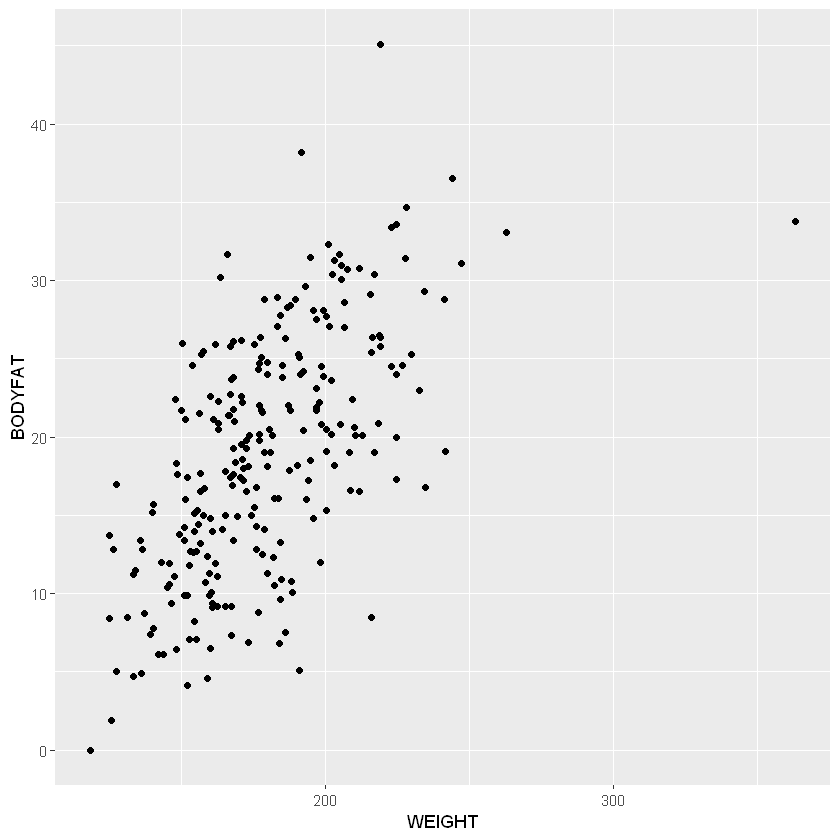

In [8]:
# Gráfico de dispersão
ggplot(bodyfat, aes(x = WEIGHT, y = BODYFAT)) + geom_point()

In [9]:
# Ajustando o modelo
ajuste <- lm(BODYFAT ~ WEIGHT, data = bodyfat)

In [10]:
summary(ajuste)


Call:
lm(formula = BODYFAT ~ WEIGHT, data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.434  -4.315   0.079   4.540  19.681 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.99515    2.38906  -4.184 3.97e-05 ***
WEIGHT       0.16171    0.01318  12.273  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.135 on 250 degrees of freedom
Multiple R-squared:  0.376,	Adjusted R-squared:  0.3735 
F-statistic: 150.6 on 1 and 250 DF,  p-value: < 2.2e-16


In [12]:
str(ajuste, max.level = 1)

List of 12
 $ coefficients : Named num [1:2] -9.995 0.162
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "WEIGHT"
 $ residuals    : Named num [1:252] -2.35 -11.12 9.69 -8.98 8 ...
  ..- attr(*, "names")= chr [1:252] "1" "2" "3" "4" ...
 $ effects      : Named num [1:252] -300.64 75.29 10.38 -9.01 7.98 ...
  ..- attr(*, "names")= chr [1:252] "(Intercept)" "WEIGHT" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:252] 14.9 18 14.9 19.9 19.8 ...
  ..- attr(*, "names")= chr [1:252] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 250
 $ xlevels      : Named list()
 $ call         : language lm(formula = BODYFAT ~ WEIGHT, data = bodyfat)
 $ terms        :Classes 'terms', 'formula'  language BODYFAT ~ WEIGHT
  .. ..- attr(*, "variables")= language list(BODYFAT, WEIGHT)
  .. ..- attr(*, "factors")= int [1:2, 1] 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. ..- attr(*, "term.labels")= chr

In [13]:
# Acessando os coeficientes do modelo
ajuste$coefficients

(Intercept)      WEIGHT 
 -9.9951510   0.1617088

In [14]:
bodyfat$predito_modelo1 <- predict(ajuste, newdata = bodyfat)
bodyfat  %>% select(WEIGHT, BODYFAT, predito_modelo1)  %>% head()  %>% knitr::kable()



| WEIGHT| BODYFAT| predito_modelo1|
|------:|-------:|---------------:|
| 154.25|    12.6|        14.94842|
| 173.25|     6.9|        18.02089|
| 154.00|    24.6|        14.90800|
| 184.75|    10.9|        19.88054|
| 184.25|    27.8|        19.79969|
| 210.25|    20.6|        24.00412|

In [15]:
# Calculando o erro quadrático médio do modelo
mse <- mean((bodyfat$BODYFAT - bodyfat$predito_modelo1)^2)
mse

[1] 37.34089

In [16]:
# Identificando se o erro é baixo ou não
erro_usando_media <- mean((bodyfat$BODYFAT - mean(bodyfat$BODYFAT))^2)
erro_usando_media

[1] 59.83737

In [17]:
print(sqrt(mse))
print(sqrt(erro_usando_media))

[1] 6.110719
[1] 7.735462


In [19]:
# Melhorando o modelo adicionando mais variáveis
ajuste2 <- lm(BODYFAT ~ WEIGHT + HEIGHT + CHEST + ABDOMEN + NECK + KNEE, data = bodyfat)

In [20]:
summary(ajuste2)


Call:
lm(formula = BODYFAT ~ WEIGHT + HEIGHT + CHEST + ABDOMEN + NECK + 
    KNEE, data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.898  -3.050  -0.097   2.870  10.216 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.33580   10.92726  -2.410  0.01669 *  
WEIGHT       -0.10530    0.03266  -3.224  0.00144 ** 
HEIGHT       -0.11242    0.08275  -1.358  0.17557    
CHEST         0.01840    0.08792   0.209  0.83439    
ABDOMEN       0.88199    0.06806  12.959  < 2e-16 ***
NECK         -0.39079    0.19561  -1.998  0.04684 *  
KNEE          0.08702    0.21077   0.413  0.68006    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.107 on 245 degrees of freedom
Multiple R-squared:  0.726,	Adjusted R-squared:  0.7192 
F-statistic: 108.2 on 6 and 245 DF,  p-value: < 2.2e-16


In [21]:
ajuste2$coefficients

(Intercept)       WEIGHT       HEIGHT        CHEST      ABDOMEN         NECK 
-26.33579660  -0.10529517  -0.11241699   0.01840060   0.88199104  -0.39078701 
        KNEE 
  0.08701991

In [23]:
# Calculando o erro
bodyfat$predito_modelo2 <- predict(ajuste2, newdata = bodyfat)
mse <- mean((bodyfat$BODYFAT - bodyfat$predito_modelo2)^2)
sqrt(mse)

[1] 4.049453

### Ajustar um modelo de regressão linear:
- Usaremos a função **lm** que recebe um fórmula de especificação do modelo e um data.frame
- A função **lm** retorna um objeto do tipo **lm**, que é um **list** que armazena diversas informações sobre o ajuste
- A função **summary** e a função **str** ajudam a identificar o conteúdo do objeto do modelo
- A função **predict** é usada para aplicar o modelo em um novo banco de dados

----